# Water potability
Based on the [Kaggle Challenge Drinking_Water_Potability](https://www.kaggle.com/artimule/drinking-water-probability)

**Context**
Access to safe drinking water is essential to health, a basic human right, and a component of effective policy for health protection. This is important as a health and development issue at a national, regional, and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

**Content**
The drinking_water_potability.csv file contains water quality metrics for 3276 different water bodies.

### WHO limits for drinkable water
- `6.5 < pH < 8.5`
- Desirable limit: `Solids < 500 mg/L` | Maximum limit: `Solids < 1000 mg/L`
- `Chloramines < 4 mg/L = 4 ppm`
- In seawater: `Sulfate ~ 2.7 mg/L` | In most fresh water supplies: `3 < Sulfate < 30 mg/L` | In some geographic locations: `Sulfate = 1000 mg/L`
- `Conductivity < 400 µS/cm`
- `Organic_carbon < 2 mg/L` in treated/drinking water | `Organic_carbon < 4 mg/L` in source water used for treatment
- `Trihalomethanes < 80 ppm`
- Recommended value: `Turbidity = 5.00 NTU`




## 0. Setup

In [5]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Numpy arrays are used to store training and test data.
import numpy as np

# Pandas is used to manipulate tabular data.
import pandas as pd

# Matplotlib is used to plot graphs.
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
# Style options for plots.
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998).
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Convenience function to create display a progress bar.
# Source : https://stackoverflow.com/questions/3173320/text-progress-bar-in-the-console
def print_progress_bar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()
 
# Saves a figure to a file
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join("./figs", fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 1. EDA

### Describe data

In [6]:
data = pd.read_csv('../drinking_water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### Univariate analysis

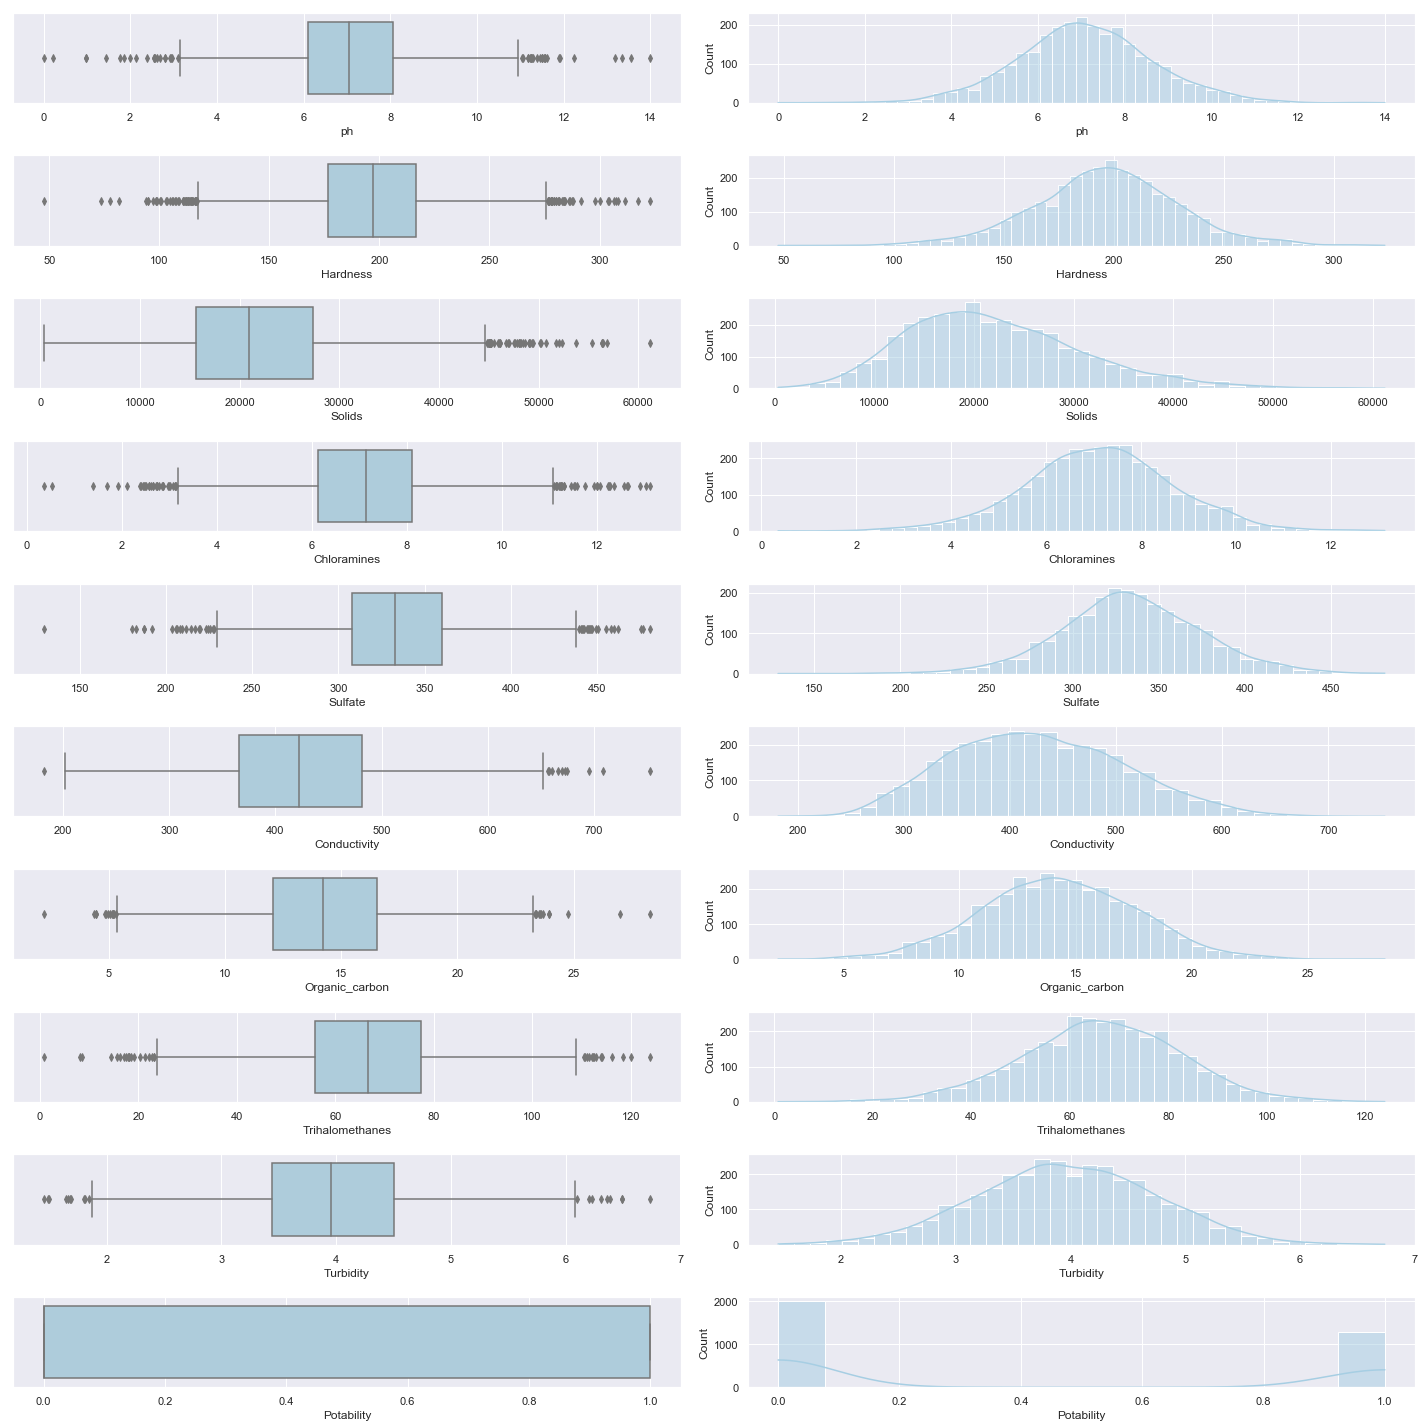

In [8]:
import seaborn as sns
sns.set(palette="Paired")
pastel_palette = {0: "C4", 1: "C2"}
bright_palette = {0: "C5", 1: "C3"}


fig, ax = plt.subplots(10, 2, figsize = (20, 20))
for i in range(len(data.columns)):
    sns.boxplot(x= data[data.columns[i]], ax = ax[i,0])
    sns.histplot(data[data.columns[i]], ax = ax[i,1], kde=True)
plt.tight_layout()

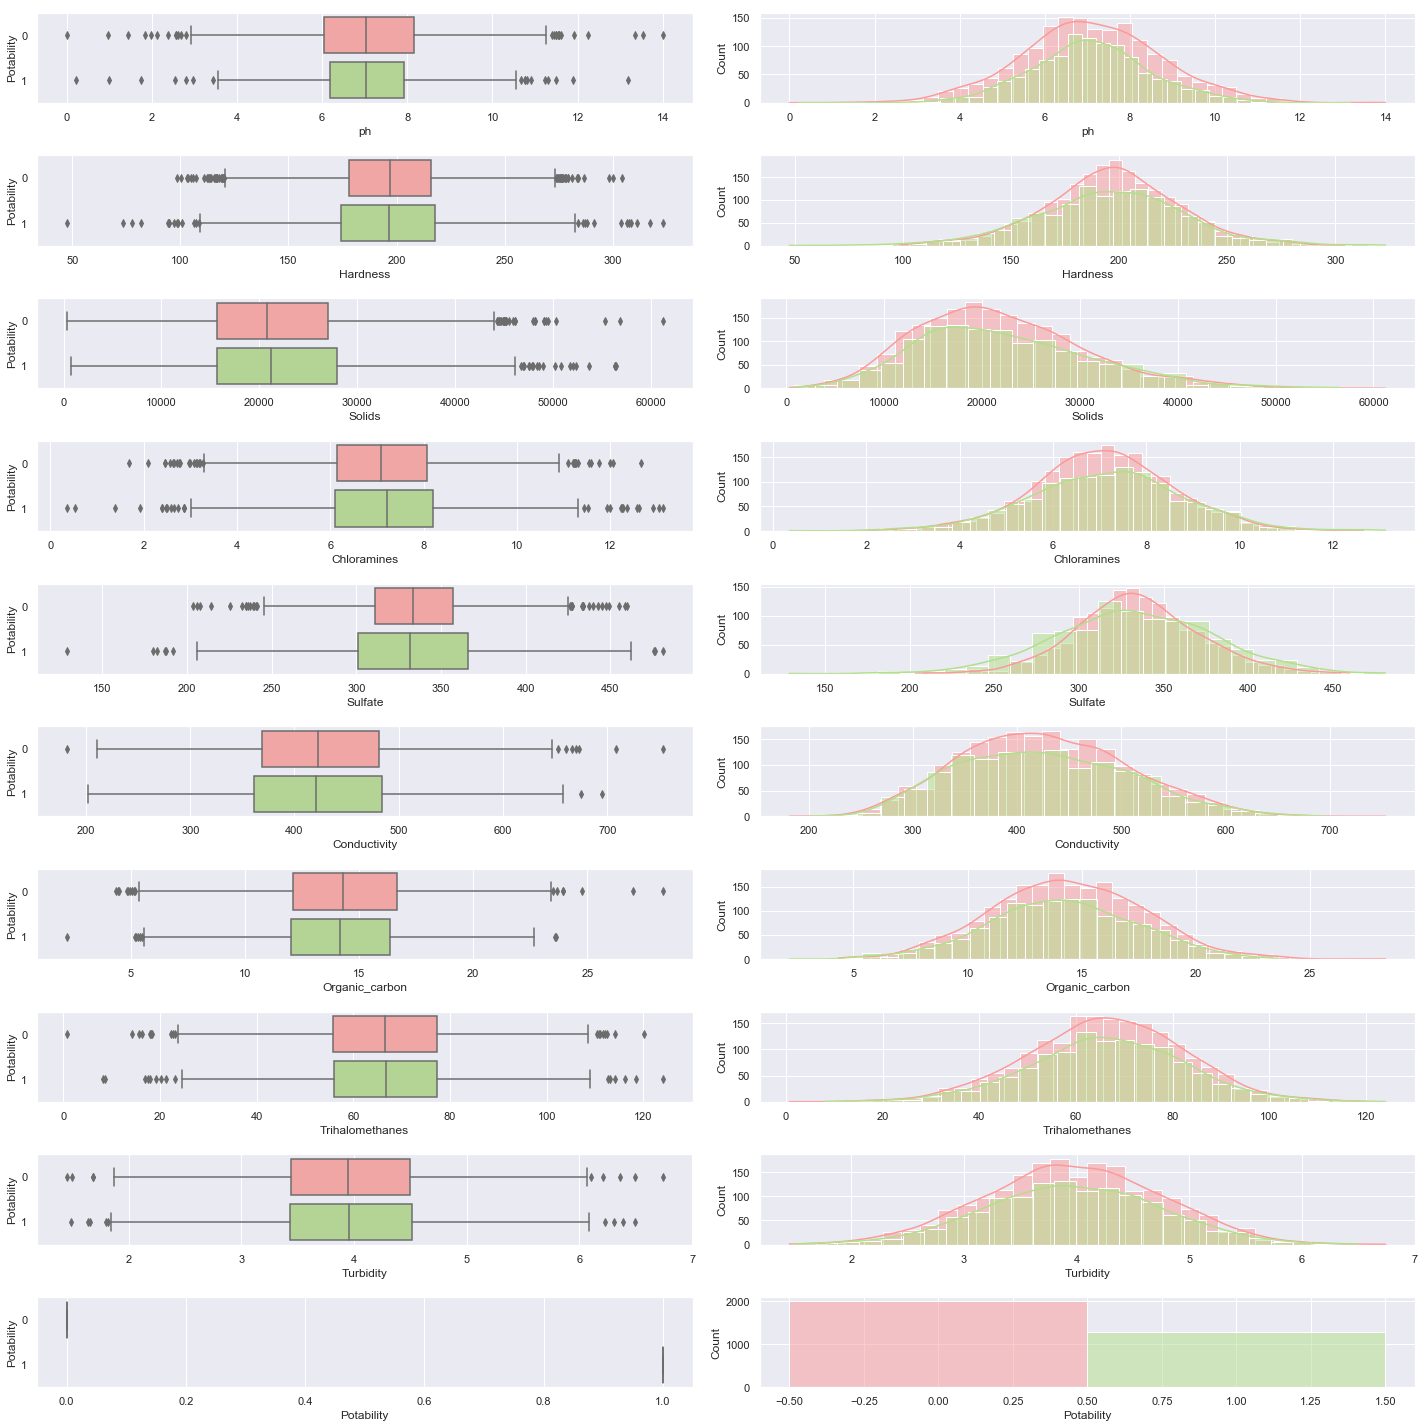

In [9]:
fig, ax = plt.subplots(len(data.columns), 2, figsize = (20, 20))
for i in range(len(data.columns)):
    sns.boxplot(y=data["Potability"], x=data[data.columns[i]], ax = ax[i,0], orient="h", palette=pastel_palette)
    sns.histplot(data[data.columns[i]].loc[data["Potability"]==0], ax = ax[i,1], kde=True, color="C4")
    sns.histplot(data[data.columns[i]].loc[data["Potability"]==1], ax = ax[i,1], kde=True, color="C2")
plt.tight_layout()

### Multivariate analysis

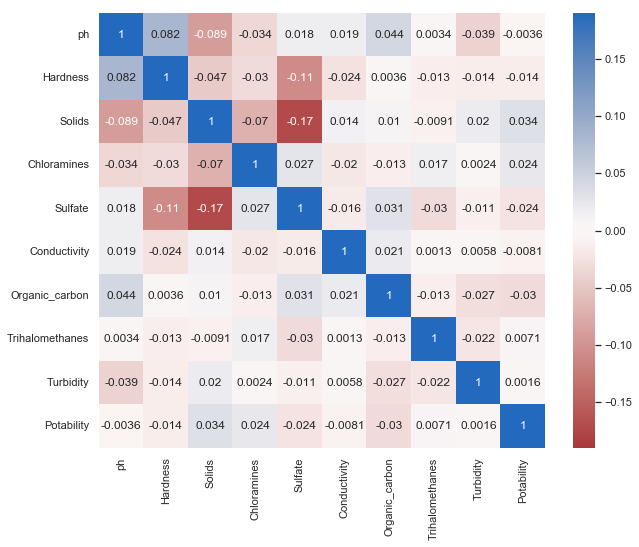

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap="vlag_r", vmin=-0.19, vmax=0.19)

<Figure size 1440x1440 with 0 Axes>

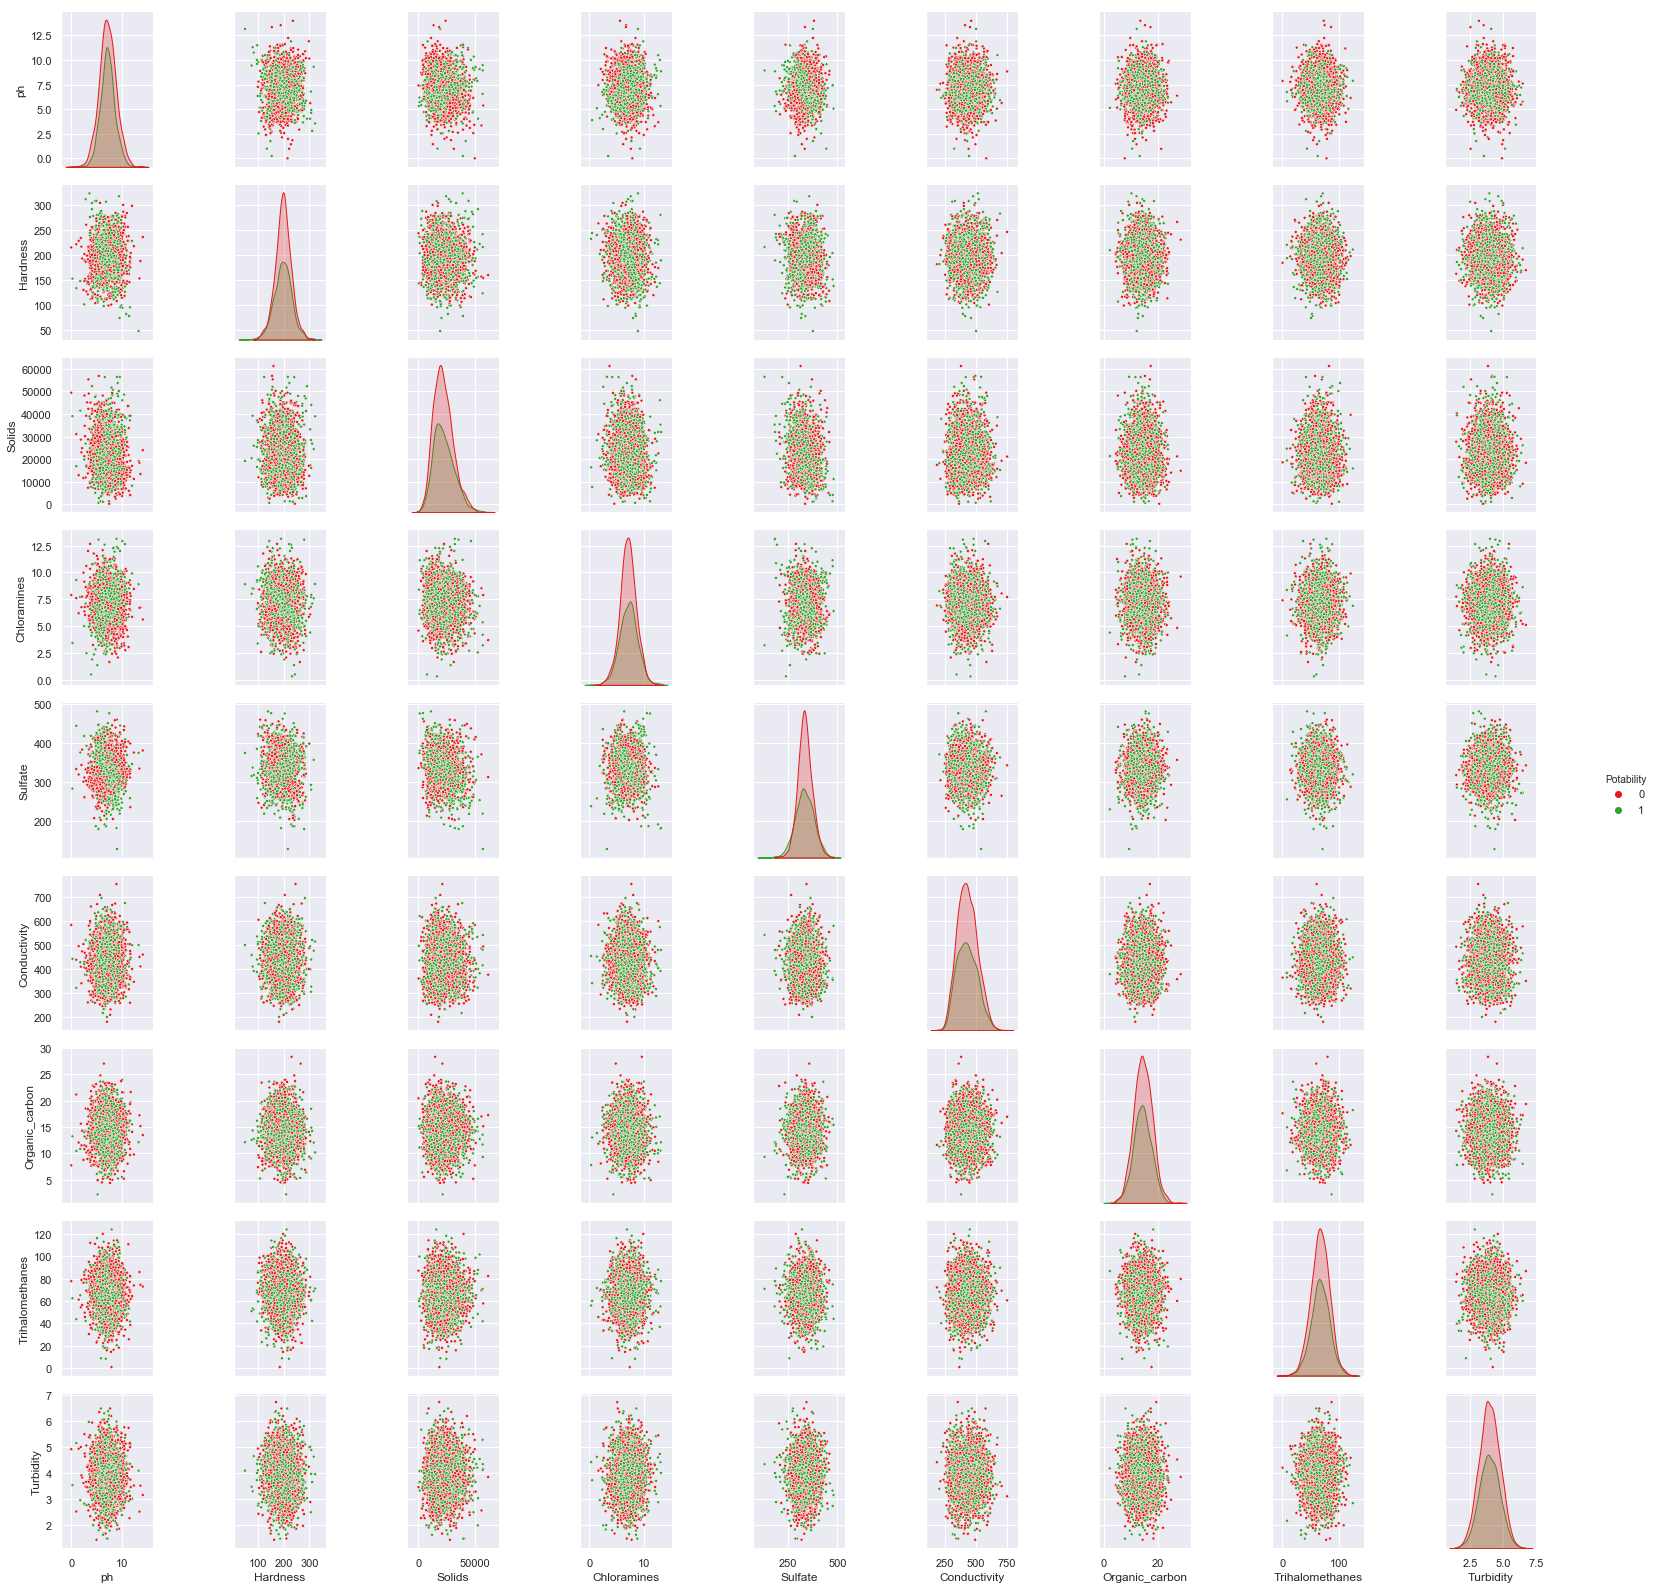

In [11]:
plt.figure(figsize=(20,20))
sns.pairplot(data, diag_kind='kde', hue="Potability", markers=".", palette=bright_palette)

### Missing values analysis

In [12]:
total = data.isnull().sum().sort_values(ascending=False)
null_rate = data.isnull().sum()/data.isnull().count()*100
rounded_null_rate = (round(null_rate, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, rounded_null_rate], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Sulfate,781,23.8
ph,491,15.0
Trihalomethanes,162,4.9
Hardness,0,0.0
Solids,0,0.0
Chloramines,0,0.0
Conductivity,0,0.0
Organic_carbon,0,0.0
Turbidity,0,0.0
Potability,0,0.0


C:\Users\jerom\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\jerom\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\jerom\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


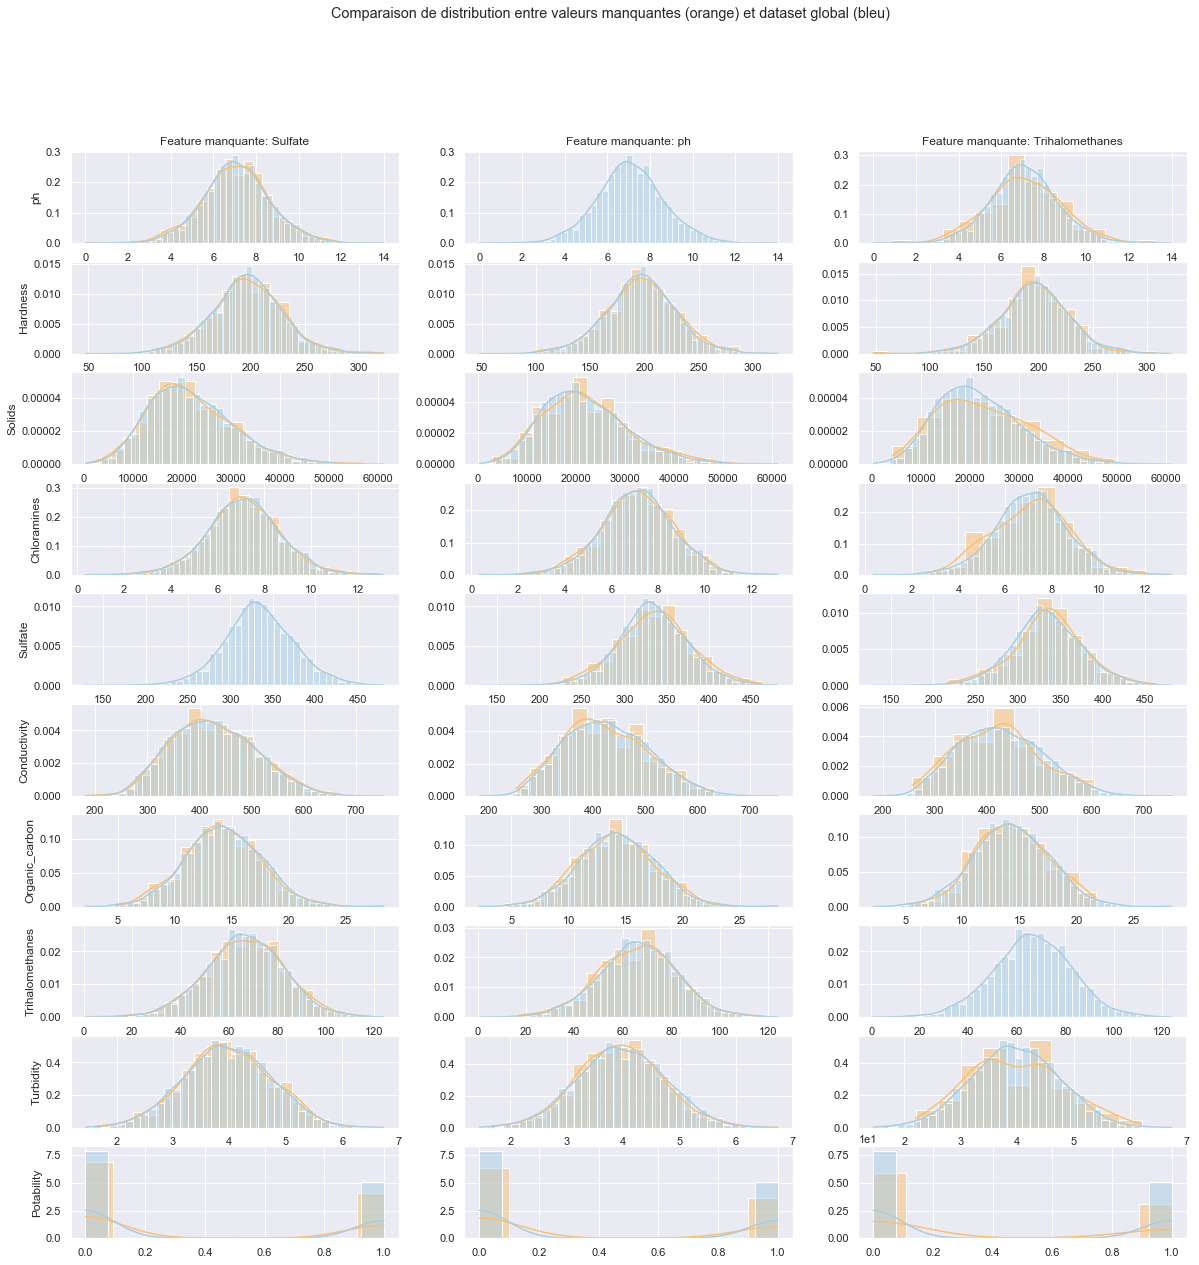

In [13]:
null_cols = total.where(total>0).dropna().keys()
fig, ax = plt.subplots(len(data.columns), len(null_cols), figsize = (20, 20))
fig.suptitle("Comparaison de distribution entre valeurs manquantes (orange) et dataset global (bleu)")

for i in range(len(data.columns)):
    for j in range(len(null_cols)):
        sns.histplot(data[data.columns[i]].loc[data[null_cols[j]].isnull()], ax = ax[i, j], color="C6", stat="density", kde=True, legend="null dist")
        sns.histplot(data[data.columns[i]], ax = ax[i, j], stat="density", kde=True, color="C0", legend="df dist")
        if(i==0):
            ax[i,j].set_title("Feature manquante: " + null_cols[j])
        if(j==0):
            ax[i,j].set_ylabel(data.columns[i])
        else:
            ax[i,j].set_ylabel("")
        ax[i,j].set_xlabel("")
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

### WHO recos fit

In [33]:
WHO_LIMITS={
    'ph': [6.5, 8.5], # [min, max]
    # 'Solids': 1000, # max 
    # 'Chloramines': 4, # max
    # 'Sulfate': [3, 30], # In most fresh water supplies
    # 'Conductivity': 400, # max
    # 'Organic_carbon': 2, # max
    'Trihalomethanes': 80 # max
}

def fit_who_recos(data):
    filtered_data=data
    for feature in WHO_LIMITS.keys():
        if type(WHO_LIMITS[feature])==list:
            filtered_data = filtered_data.loc[(filtered_data[feature]>=WHO_LIMITS[feature][0]) & (filtered_data[feature]<=WHO_LIMITS[feature][1])]
        else:
            filtered_data = filtered_data.loc[filtered_data[feature]<=WHO_LIMITS[feature]]
    return filtered_data


In [37]:
who_compliant = fit_who_recos(data)
who_compliant.loc[who_compliant["Potability"]==True]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
253,6.800119,242.008082,39143.40333,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.10246,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
256,8.322987,207.252462,28049.64628,8.827061,297.813085,358.725869,18.709273,60.911420,4.052136,1
262,6.548021,278.585105,25508.38695,6.749378,366.871502,497.321753,16.563167,79.323678,3.611860,1
264,6.618011,233.661636,19598.86074,4.701049,432.556385,401.669791,11.766146,73.191921,4.437696,1
...,...,...,...,...,...,...,...,...,...,...
3263,6.923636,260.593154,24792.52562,5.501164,332.232177,607.773567,15.483027,51.535867,4.013339,1
3265,8.197353,203.105091,27701.79405,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1
3266,8.372910,169.087052,14622.74549,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3268,6.702547,207.321086,17246.92035,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1


In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin
from tqdm import tqdm

In [105]:
class OMSClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, scaler):
        self.columns = []
        self.scaler = scaler
        pass
    def fit(self, X, y):
        pass
    def predict(self, X):
        X_copy = self.scaler.inverse_transform(X, copy=True)
        return np.logical_and(6.5<X_copy[:,0], X_copy[:,0]<8.6, X_copy[:,7]<=80).astype(int)

In [106]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score

transformer = Pipeline(
    [
        ("Missing_values_handler", IterativeImputer(max_iter=10, random_state=0, sample_posterior=True)),
        ("Scaler", StandardScaler()),
    ]
)

model = Pipeline([("transformer", transformer), ("model", OMSClassifier(transformer.named_steps["Scaler"]))])
model.fit(data.drop("Potability", axis=1), data["Potability"])
pred = model.predict(data.drop("Potability", axis=1))

[7.88614889 3.71608007 8.09912419 ... 9.41951032 5.12676292 7.87467136]
[86.99097046 56.32907628 66.42009251 ... 69.84540029 77.4882131
 78.69844633]


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
